In [1]:
from google.colab import files
uploaded = files.upload()



Saving AB_NYC_2019.csv to AB_NYC_2019.csv


Before Cleaning: (48895, 16)
After Cleaning: (44129, 16)

📊 Before vs After Cleaning:
        Metric  Before  After
          Rows   48895  44129
Missing Values   20141      0
Duplicate Rows       0      0

📝 Cleaning Steps Summary:
  Step                        Action                                Details
Step 1                Loaded dataset                 48895 rows, 16 columns
Step 2 Filled numeric missing values Missing values reduced from 20141 to 0
Step 3    Filled text missing values            Replaced NaN with 'Unknown'
Step 4            Removed duplicates                                  0 ➡ 0
Step 5            Standardized dates     Converted date columns to datetime
Step 6              Removed outliers                 Final row count: 44129
Step 7            Saved cleaned file                 airbnb_nyc_cleaned.csv


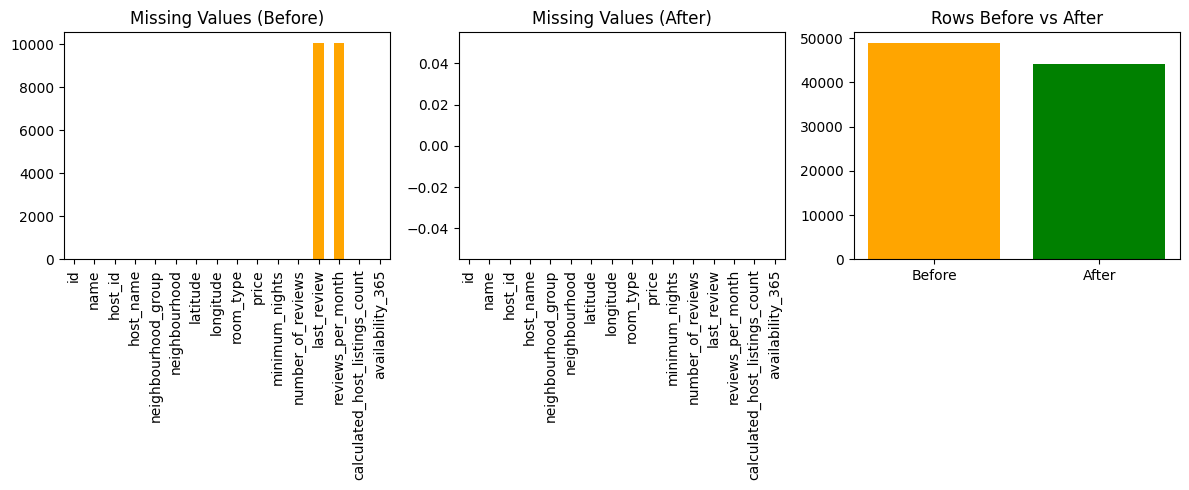

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Load the dataset
df = pd.read_csv("AB_NYC_2019.csv")  # Change name if needed
before_df = df.copy()  # Keep original copy
print(f"Before Cleaning: {df.shape}")

# Step 2: Missing values before cleaning
missing_before = df.isnull().sum()

# Step 3: Fill missing values
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
df[num_cols] = df[num_cols].fillna(df[num_cols].mean())

str_cols = df.select_dtypes(include=['object']).columns
df[str_cols] = df[str_cols].fillna("Unknown")

# Step 4: Remove duplicates
df.drop_duplicates(inplace=True)

# Step 5: Standardize dates
for col in df.columns:
    if 'date' in col.lower():
        df[col] = pd.to_datetime(df[col], errors='coerce')

# Step 6: Remove outliers
for col in num_cols:
    df = df[(np.abs(df[col] - df[col].mean()) <= (3 * df[col].std()))]

# Step 7: Save cleaned file
df.to_csv("airbnb_nyc_cleaned.csv", index=False)
print(f"After Cleaning: {df.shape}")

# --- Summary Data ---
missing_after = df.isnull().sum()
before_rows = before_df.shape[0]
after_rows = df.shape[0]
before_missing_total = missing_before.sum()
after_missing_total = missing_after.sum()
before_duplicates = before_df.duplicated().sum()
after_duplicates = df.duplicated().sum()

# Create Before vs After DataFrame
summary_stats = pd.DataFrame({
    "Metric": ["Rows", "Missing Values", "Duplicate Rows"],
    "Before": [before_rows, before_missing_total, before_duplicates],
    "After": [after_rows, after_missing_total, after_duplicates]
})
print("\n📊 Before vs After Cleaning:")
print(summary_stats.to_string(index=False))

# Create Step-by-Step Summary
steps_summary = [
    ["Step 1", "Loaded dataset", f"{before_rows} rows, {before_df.shape[1]} columns"],
    ["Step 2", "Filled numeric missing values", f"Missing values reduced from {before_missing_total} to {after_missing_total}"],
    ["Step 3", "Filled text missing values", "Replaced NaN with 'Unknown'"],
    ["Step 4", "Removed duplicates", f"{before_duplicates} ➡ {after_duplicates}"],
    ["Step 5", "Standardized dates", "Converted date columns to datetime"],
    ["Step 6", "Removed outliers", f"Final row count: {after_rows}"],
    ["Step 7", "Saved cleaned file", "airbnb_nyc_cleaned.csv"]
]
steps_df = pd.DataFrame(steps_summary, columns=["Step", "Action", "Details"])
print("\n📝 Cleaning Steps Summary:")
print(steps_df.to_string(index=False))

# --- Charts ---
plt.figure(figsize=(12, 5))

# Missing values before
plt.subplot(1, 3, 1)
missing_before.plot(kind='bar', color='orange')
plt.title("Missing Values (Before)")
plt.xticks(rotation=90)

# Missing values after
plt.subplot(1, 3, 2)
missing_after.plot(kind='bar', color='green')
plt.title("Missing Values (After)")
plt.xticks(rotation=90)

# Row count comparison
plt.subplot(1, 3, 3)
plt.bar(["Before", "After"], [before_rows, after_rows], color=['orange', 'green'])
plt.title("Rows Before vs After")

plt.tight_layout()
plt.show()
